<a href="https://colab.research.google.com/github/jcjimenezb123/MetodosNumericosPython/blob/master/01Interpolacion_coefs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
from scipy.interpolate import CubicSpline,lagrange
import matplotlib.pyplot as plt

In [8]:
x = np.linspace(-2, 2, 11)
p = lambda x: x**3+2*x**2+x+1
y_or = p(x)
perturbacion = np.random.normal(0, 1, len(x))  # Perturbación aleatoria (mean,std,size)
y = y_or + perturbacion

In [9]:
lag = lagrange(x, y)
xi = 1.5
yi = lag(xi)
print(lag)
print(lag.c)

          10          9          8         7       6         5
-0.08303 x  + 0.7448 x + 0.9696 x - 6.032 x - 3.8 x + 15.74 x
          4         3          2
 + 5.598 x - 14.18 x - 0.4212 x + 5.343 x + 0.9089
[ -0.08302994   0.74483743   0.96964495  -6.03176144  -3.80020718
  15.73733608   5.59768421 -14.18197468  -0.42120016   5.34318977
   0.90890047]


In [10]:
sc = CubicSpline(x, y)
xi = 1.5
yi = sc(xi)
print(sc.c.T)

[[  6.52443797 -12.41550875   8.58021295  -1.33639765]
 [  6.52443797  -4.5861832    1.77953617   0.52677016]
 [-13.33895296   3.24314236   1.24231984   0.92235935]
 [ 24.57503438 -12.76360119  -2.56586369   1.08449707]
 [-15.05962956  16.72644007  -0.98072814  -0.4112224 ]
 [ -6.42874621  -1.34511541   5.17180172   0.90890047]
 [ 27.96134645  -9.05961086   1.00991122   2.35096293]
 [-37.10384521  24.49400488   7.18366883   3.09491586]
 [ 33.25873221 -20.03060937   8.96902703   7.51277808]
 [ 33.25873221  19.87986928   8.908731    10.02405025]]


In [11]:
# Coeficientes de los polinomios por intervalo
coefs = sc.c  # Matriz con [d_i, c_i, b_i, a_i] por intervalo

# Mostrar coeficientes
for i in range(len(x) - 1):
    print(f"Intervalo [{x[i]}, {x[i+1]}]:")
    #El coeficiente 𝑎 es el valor de 𝑦 en el nodo izquierdo del intervalo.
    #Los coeficientes 𝑏,𝑐,𝑑 se calculan para garantizar la suavidad en las derivadas y la continuidad en los intervalos.
    d = coefs[0, i]
    c = coefs[1, i]
    b = coefs[2, i]
    a = coefs[3, i]
    print(f'y = {a:e} + {b:e}*(x-{x[i]}) + {c:e}*(x-{x[i]})**2 + {d:e}*(x-{x[i]})**3')
    if x[i]<=xi<=x[i+1]:
      yii = a + b*(xi-x[i]) + c*(xi-x[i])**2 + d*(xi-x[i])**3
      print(f"xi = {xi},    yii = {yii} [{yi}]")

Intervalo [-2.0, -1.6]:
y = -1.336398e+00 + 8.580213e+00*(x--2.0) + -1.241551e+01*(x--2.0)**2 + 6.524438e+00*(x--2.0)**3
Intervalo [-1.6, -1.2]:
y = 5.267702e-01 + 1.779536e+00*(x--1.6) + -4.586183e+00*(x--1.6)**2 + 6.524438e+00*(x--1.6)**3
Intervalo [-1.2, -0.7999999999999998]:
y = 9.223593e-01 + 1.242320e+00*(x--1.2) + 3.243142e+00*(x--1.2)**2 + -1.333895e+01*(x--1.2)**3
Intervalo [-0.7999999999999998, -0.3999999999999999]:
y = 1.084497e+00 + -2.565864e+00*(x--0.7999999999999998) + -1.276360e+01*(x--0.7999999999999998)**2 + 2.457503e+01*(x--0.7999999999999998)**3
Intervalo [-0.3999999999999999, 0.0]:
y = -4.112224e-01 + -9.807281e-01*(x--0.3999999999999999) + 1.672644e+01*(x--0.3999999999999999)**2 + -1.505963e+01*(x--0.3999999999999999)**3
Intervalo [0.0, 0.40000000000000036]:
y = 9.089005e-01 + 5.171802e+00*(x-0.0) + -1.345115e+00*(x-0.0)**2 + -6.428746e+00*(x-0.0)**3
Intervalo [0.40000000000000036, 0.8000000000000003]:
y = 2.350963e+00 + 1.009911e+00*(x-0.40000000000000036) + -9.0

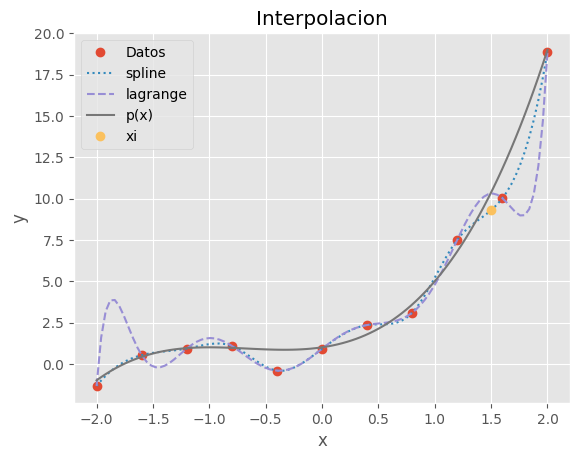

In [12]:
xs = np.linspace(x.min(),x.max(),100)
plt.style.use('ggplot')#('seaborn-v0_8-dark-palette')
plt.plot(x, y, 'o',label='Datos')
plt.plot(xs, sc(xs), ':',label='spline')
plt.plot(xs, lag(xs), '--',label='lagrange')
plt.plot(xs, p(xs), '-',label='p(x)')
plt.plot(xi, yi, 'o',label='xi')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolacion')
#plt.grid()
plt.show()